In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

# kernel: scpy

import sys
sys.path.append('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/libraries/')
from data_processing import *

### Read HPC data

In [ ]:
dataset            = 'LATTICeA_5x'

meta_field         = None
matching_field     = 'samples'
resolution         = 2.5
fold_number        = 2
groupby            = 'leiden_%s' % resolution
meta_folder        = 'rapids_2p5m'
folds_pickle       = '/mnt/cephfs/home/users/krakovic/sharedscratch/Histomorphological-Phenotype-Learning/utilities/fold_creation/lattice_5x_folds_noNaN.pkl'
additional_as_fold = False
h5_complete_path   = '/mnt/cephfs/home/users/krakovic/sharedscratch/Histomorphological-Phenotype-Learning/results/BarlowTwins_3/LATTICeA_5x/h224_w224_n3_zdim128_filtered/hdf5_LATTICeA_5x_he_complete_surv_sex_filtered.h5'
h5_additional_path = '/mnt/cephfs/home/users/krakovic/sharedscratch/Histomorphological-Phenotype-Learning/results/BarlowTwins_3/LATTICeA_5x/h224_w224_n3_zdim128_filtered/hdf5_TCGA_LUAD_5x_he_train_filtered_overall_survival.h5'
# h5_additional_path = None
Transform          = False

main_cluster_path = h5_complete_path.split('hdf5_')[0]
main_cluster_path = os.path.join(main_cluster_path, meta_folder)
adatas_path       = os.path.join(main_cluster_path, 'adatas')
# figure_path       = os.path.join(main_cluster_path, 'leiden_%s_fold%s' % (str(resolution).replace('.','p'),fold_number))
# figure_path       = os.path.join(figure_path,       'figures')
# if not os.path.isdir(figure_path):
    # os.makedirs(figure_path)

# folds = load_existing_split(folds_pickle)
# fold = folds[fold_number]

In [3]:
leiden_clusters, malignant_clusters, stromal_clusters = load_topography()
all_abnormal = np.sort(np.append(malignant_clusters, stromal_clusters))
complete_df, additional_df, leiden_clusters = read_csvs_forcefold(adatas_path=adatas_path, groupby=groupby, h5_complete_path=h5_complete_path, h5_additional_path=h5_additional_path, force_fold=2)

In [4]:
print(f"Samples: {complete_df['samples'].nunique()}, Slides: {complete_df['slides'].nunique()}")

Samples: 1007, Slides: 4427


In [5]:
print(f"Slides: {additional_df['slides'].nunique()}, Samples: {additional_df['samples'].nunique()}")

Slides: 501, Samples: 439


In [6]:
if os.path.isfile('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_all_clusters.csv'):
    sample_df_latticea_all = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_all_clusters.csv', index_col=0)
else:
    sample_df_latticea_all = generate_frequency_vector(complete_df=complete_df, matching_field='samples', groupby=groupby, leiden_clusters=leiden_clusters, transform=False)
    sample_df_latticea_all.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_all_clusters.csv')

if os.path.isfile('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_all_abnormal_clusters.csv'):
    sample_df_latticea_all_abnormal = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_all_abnormal_clusters.csv', index_col=0)
else:
    sample_df_latticea_all_abnormal = generate_frequency_vector(complete_df=complete_df, matching_field='samples', groupby=groupby, leiden_clusters=malignant_clusters, transform=False)
    sample_df_latticea_all_abnormal.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_all_abnormal_clusters.csv')

if os.path.isfile('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_malignant_clusters.csv'):
    sample_df_latticea_malignant = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_malignant_clusters.csv', index_col=0)
else:
    sample_df_latticea_malignant = generate_frequency_vector(complete_df=complete_df, matching_field='samples', groupby=groupby, leiden_clusters=malignant_clusters, transform=False)
    sample_df_latticea_malignant.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/LATTICeA_samples_frame_malignant_clusters.csv')

In [7]:
if os.path.isfile('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_all_clusters.csv'):
    sample_df_tcga_all = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_all_clusters.csv', index_col=0)
else:
    sample_df_tcga_all = generate_frequency_vector(complete_df=additional_df, matching_field='samples', groupby=groupby, leiden_clusters=leiden_clusters, transform=False)
    sample_df_tcga_all.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_all_clusters.csv')

if os.path.isfile('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_all_abnormal_clusters.csv'):
    sample_df_tcga_all_abnormal = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_all_abnormal_clusters.csv', index_col=0)
else:
    sample_df_tcga_all_abnormal = generate_frequency_vector(complete_df=additional_df, matching_field='samples', groupby=groupby, leiden_clusters=malignant_clusters, transform=False)
    sample_df_tcga_all_abnormal.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_all_abnormal_clusters.csv')

if os.path.isfile('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_malignant_clusters.csv'):
    sample_df_tcga_malignant = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_malignant_clusters.csv', index_col=0)
else:
    sample_df_tcga_malignant = generate_frequency_vector(complete_df=additional_df, matching_field='samples', groupby=groupby, leiden_clusters=malignant_clusters, transform=False)
    sample_df_tcga_malignant.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/base/TCGA_LUAD_samples_frame_malignant_clusters.csv')

In [9]:
from supercluster_dictionary import assign_supercluster_v2

latticea_malignant_melt = pd.melt(sample_df_latticea_malignant, id_vars='samples', value_vars=[col for col in sample_df_latticea_malignant.columns if col != 'samples'], var_name='cluster', value_name='proportion')
latticea_malignant_melt['cluster'] = latticea_malignant_melt['cluster'].apply(lambda x: f'HPC {x}')
latticea_malignant_melt['supercluster'] = latticea_malignant_melt['cluster'].apply(lambda x: assign_supercluster_v2(x))
latticea_malignant_melt.loc[latticea_malignant_melt['cluster'] == 'HPC 13', 'supercluster'] = 'Hot, discohesive (high risk)'
latticea_malignant_melt = latticea_malignant_melt.groupby(['samples', 'supercluster']).agg('mean').reset_index()
latticea_malignant_melt = latticea_malignant_melt[latticea_malignant_melt['supercluster'] != 'Unknown']
latticea_malignant_melt = latticea_malignant_melt.pivot(index='samples', columns='supercluster', values='proportion')
latticea_malignant_melt = latticea_malignant_melt.rename(columns={'Hot, discohesive':'Hot, discohesive (low risk)'})
latticea_malignant_melt

/tmp/ipykernel_2272457/3839860800.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  latticea_malignant_melt = latticea_malignant_melt.groupby(['samples', 'supercluster']).agg('mean').reset_index()


supercluster,"Cold, cohesive","Cold, discohesive","Hot, cohesive","Hot, discohesive (low risk)","Hot, discohesive (high risk)"
samples,,,,,
ACA_0001,0.000717,0.007319,0.100690,0.059598,0.003764
ACA_0002,0.022766,0.072045,0.040837,0.044821,0.017928
ACA_0003,0.047478,0.035327,0.025480,0.027326,0.010340
ACA_0004,0.078644,0.015993,0.012626,0.047980,0.095960
ACA_0005,0.002646,0.014660,0.116898,0.056713,0.000000
...,...,...,...,...,...
ACA_1108,0.008128,0.018678,0.124569,0.053879,0.005172
ACA_1109,0.031751,0.044728,0.023209,0.020520,0.284353
ACA_1110,0.012788,0.047101,0.052909,0.082321,0.024297


### Read clinical data

In [10]:
from clinical import load_clinical

clinpath, survival, patterns_samples = load_clinical()
patterns_samples = patterns_samples.merge(clinpath[['samples', 'In Situ Proportion (%)', 'Acinar Proportion (%)', 'Papillary Proportion (%)', 'Cribriform Proportion (%)', 'Solid Proportion (%)', 'Micropapillary Proportion (%)']]).fillna(0)
patterns_samples = patterns_samples.drop(labels=['iaslc_grade', 'iaslc_grade_'], axis=1)
# patterns_samples = patterns_samples.drop(labels=['iaslc_grade', 'iaslc_grade_', 'In Situ Proportion (%)', 'Papillary Proportion (%)', 'Micropapillary Proportion (%)'], axis=1)
patterns_samples = patterns_samples[patterns_samples['samples'].isin(latticea_malignant_melt.index)]
patterns_samples

/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/libraries/clinical.py:7: DtypeWarning: Columns (2,10,30,37,38,52,67,84,85,110,118,134,135,136,137,138,148,149,150,217,219,221,223,224,225,226,236,242,243,244,245,248,249,250,251,252,253,254,255,256,257,261,262,263,264,265,266,267,268,269,270,271,280,282,283,285,288,289,294,295,298,299,310,311,312,313,314,315,316,317,340,374,440,441,442,443,446,447,448,449,450,451,452,453,454,455,459,460,461,462,463,464,465,466,467,468,469,481,487,508,509,510,511,512,513,514,515,538,572,638,639,640,641,644,645,646,647,648,649,650,651,652,653,657,658,659,660,661,662,663,664,665,666,667,679,685,706,707,708,709,710,711,712,713,736,770,834,835,836,839,863,887) have mixed types. Specify dtype option on import or set low_memory=False.
  clinpath = pd.read_csv('/mnt/cephfs/home/users/krakovic/sharedscratch/datasets/LATTICeA/latticea_master_clinicopathological.csv')


,samples,In Situ Proportion (%),Acinar Proportion (%),Papillary Proportion (%),Cribriform Proportion (%),Solid Proportion (%),Micropapillary Proportion (%)
0,ACA_0001,40.0,60.0,0.0,0.0,0.0,0.0
1,ACA_0002,25.0,50.0,0.0,0.0,25.0,0.0
2,ACA_0003,40.0,55.0,0.0,5.0,0.0,0.0
3,ACA_0004,0.0,10.0,0.0,0.0,90.0,0.0
4,ACA_0005,85.0,15.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1020,ACA_1108,0.0,80.0,0.0,0.0,20.0,0.0
1021,ACA_1109,15.0,25.0,0.0,0.0,60.0,0.0
1022,ACA_1110,0.0,20.0,0.0,50.0,20.0,10.0
1023,ACA_1112,0.0,20.0,0.0,0.0,80.0,0.0


### Compute correlation

In [11]:
merged_supercluster_gp = latticea_malignant_melt.merge(patterns_samples, on='samples')
merged_supercluster_gp

,samples,"Cold, cohesive","Cold, discohesive","Hot, cohesive","Hot, discohesive (low risk)","Hot, discohesive (high risk)",In Situ Proportion (%),Acinar Proportion (%),Papillary Proportion (%),Cribriform Proportion (%),Solid Proportion (%),Micropapillary Proportion (%)
0,ACA_0001,0.000717,0.007319,0.100690,0.059598,0.003764,40.0,60.0,0.0,0.0,0.0,0.0
1,ACA_0002,0.022766,0.072045,0.040837,0.044821,0.017928,25.0,50.0,0.0,0.0,25.0,0.0
2,ACA_0003,0.047478,0.035327,0.025480,0.027326,0.010340,40.0,55.0,0.0,5.0,0.0,0.0
3,ACA_0004,0.078644,0.015993,0.012626,0.047980,0.095960,0.0,10.0,0.0,0.0,90.0,0.0
4,ACA_0005,0.002646,0.014660,0.116898,0.056713,0.000000,85.0,15.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1002,ACA_1108,0.008128,0.018678,0.124569,0.053879,0.005172,0.0,80.0,0.0,0.0,20.0,0.0
1003,ACA_1109,0.031751,0.044728,0.023209,0.020520,0.284353,15.0,25.0,0.0,0.0,60.0,0.0
1004,ACA_1110,0.012788,0.047101,0.052909,0.082321,0.024297,0.0,20.0,0.0,50.0,20.0,10.0
1005,ACA_1112,0.030270,0.019309,0.032012,0.086509,0.195122,0.0,20.0,0.0,0.0,80.0,0.0


In [14]:
corr_mat

,"Hot, discohesive (high risk)",In Situ Proportion (%),Acinar Proportion (%),Papillary Proportion (%),Cribriform Proportion (%),Solid Proportion (%),Micropapillary Proportion (%)
"Cold, discohesive",0.248146,-0.218465,0.291372,-0.139806,0.114291,0.185220,0.078997
"Hot, cohesive",-0.083085,0.298773,0.209784,0.197076,-0.104769,-0.355562,0.042345
"Hot, discohesive (low risk)",0.276441,-0.273500,0.117379,-0.124136,0.067878,0.339241,-0.015448


In [21]:
corr_mat = merged_supercluster_gp.corr(method='spearman')
corr_mat = corr_mat[corr_mat.index.isin(['Hot, cohesive', 'Hot, discohesive (low risk)', 'Hot, discohesive (high risk)', 'Cold, cohesive', 'Cold, discohesive'])]
corr_mat = corr_mat[[col for col in corr_mat.columns if col not in ['Hot, cohesive', 'Hot, discohesive (low risk)', 'Hot, discohesive (high risk)', 'Cold, cohesive', 'Cold, discohesive']]]
corr_mat.columns = ['Lepidic', 'Acinar', 'Papillary', 'Cribriform', 'Solid', 'Micropapillary']
corr_mat

/tmp/ipykernel_2272457/1514734543.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = merged_supercluster_gp.corr(method='spearman')


,Lepidic,Acinar,Papillary,Cribriform,Solid,Micropapillary
"Cold, cohesive",-0.405320,-0.176801,0.131059,0.332461,0.269262,0.090160
"Cold, discohesive",-0.218465,0.291372,-0.139806,0.114291,0.185220,0.078997
"Hot, cohesive",0.298773,0.209784,0.197076,-0.104769,-0.355562,0.042345
"Hot, discohesive (low risk)",-0.273500,0.117379,-0.124136,0.067878,0.339241,-0.015448
"Hot, discohesive (high risk)",-0.342714,-0.098830,-0.190704,0.090353,0.580538,-0.063747


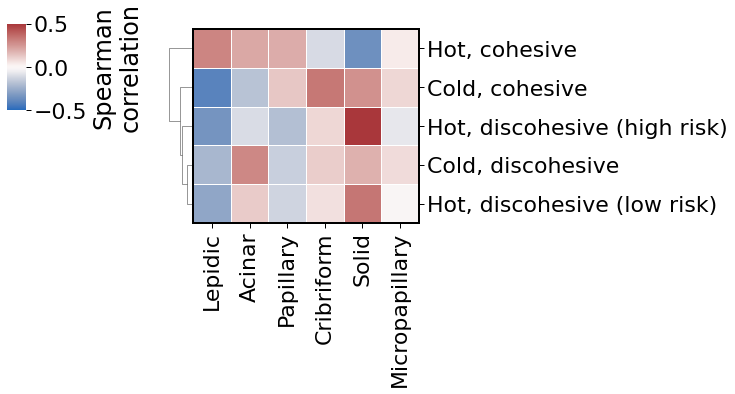

In [24]:
sns.set_context("paper", font_scale=2.5)
from matplotlib.patches import Rectangle

g = sns.clustermap(corr_mat,
               cmap='vlag',
               vmin=-0.5, vmax=0.5,
               row_cluster=True,
               col_cluster=False,
               linewidth=.5,
               dendrogram_ratio=(.1, .1),
               cbar_pos=(-.22, 0.7, .03, .2),
               cbar_kws={'label':'Spearman\ncorrelation'},
               figsize=(8.5,6))

n_rows, n_cols = corr_mat.shape

rect = Rectangle(
    xy=(0, 0),  # Lower left corner
    width=n_cols,
    height=n_rows,
    fill=False,
    edgecolor='black',
    linewidth=2,
    clip_on=False
)
g.ax_heatmap.add_patch(rect)
# g.ax_heatmap.set_xlabel('Leiden cluster')
# g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0);


plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/supercluster_vs_growth_pattern_spearman_rotate_v20250331.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)